In [1]:
%pylab inline
import torch

Populating the interactive namespace from numpy and matplotlib


In [9]:
import cv2
import re
from PIL import Image
from PIL import ImageFilter

import math


In [24]:
img = np.zeros((32,32,3))
img.dtype = np.uint8
img

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
# mean for red image 0.33, for white img 1, for black img 0

In [12]:
img = cv2.imread("test.jpg")

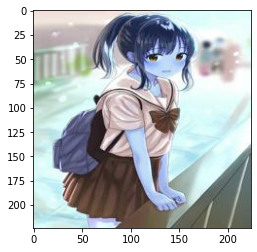

In [13]:
plt.imshow(img)

In [14]:
def change_brightness(img_arr, min_val=0.9, max_val=1.1):
  value = 0.9
  hsv = cv2.cvtColor(img_arr, cv2.COLOR_BGR2HSV)
  hsv = np.array(hsv, dtype=np.float64)
  hsv[:,:,1] = hsv[:,:,1]*value
  hsv[:,:,1][hsv[:,:,1]>255] = 255
  hsv[:,:,2] = hsv[:,:,2]*value
  hsv[:,:,2][hsv[:,:,2]>255] = 255
  hsv = np.array(hsv, dtype=np.uint8)
  img_arr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
  return img_arr


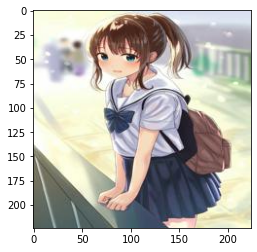

In [19]:
plt.imshow(cv2.flip(img, 1))

In [15]:
def clac_receptive_field(f_d, p, k, s, j_in, r_in, start_in):
  f_out = int((f_d + 2*p - k) / s + 1)
  j_out = j_in * s
  r_out = r_in + (k - 1) * j_in
  start_out = start_in + ((k - 1) / 2 - p)*j_in
  
  print(f"f_out:{f_out}, j_out:{j_out}, r_out:{r_out}, start_out:{start_out}")
  return f_out, j_out, r_out, start_out


In [17]:
clac_receptive_field(f_d=256,p=1,k=3,s=2,j_in=1,r_in=1,start_in=0.5)

f_out:128, j_out:2, r_out:3, start_out:0.5


(128, 2, 3, 0.5)

In [18]:
clac_receptive_field(f_d=128,p=1,k=3,s=1,j_in=2,r_in=3,start_in=0.5)

f_out:128, j_out:2, r_out:7, start_out:0.5


(128, 2, 7, 0.5)

In [29]:
clac_receptive_field(f_d=32,p=1,k=3,s=1,j_in=16,r_in=119,start_in=0.5)

f_out:32, j_out:16, r_out:151, start_out:0.5


(32, 16, 151, 0.5)

In [30]:
288*2

576

In [31]:
(576 - 512)//2

32

In [21]:
sum([(i+1)%4 for i in reversed(range(4))])

6

In [23]:
if 1 > 0 : a=10

In [31]:
np.sum([(i+1)%4 for i in range(3,-1,-1)])

6

In [30]:
[(i+1)%4 for i in reversed(range(4))]

[0, 3, 2, 1]

In [19]:
import torch

In [20]:
preds = torch.ones(3,8,8)

tensor([[3., 3., 3., 3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3., 3., 3., 3.]])

In [45]:
model = EfficientNet.from_pretrained('efficientnet-b1')
layers = list(model.children())
layers = layers[:-6]


with torch.no_grad():
  img = torch.randn(1,3,256,256)
  for i in range(len(layers)):
    if i != len(layers) - 1:
      img = layers[i](img)
      print(f"i: {i}, img : {img.shape}")
    else:
      for j in range(len(layers[i])):
        img = layers[i][j](img)
        print(f"i: {i}, j: {j}, img : {img.shape}")



Loaded pretrained weights for efficientnet-b1
i: 0, img : torch.Size([1, 32, 128, 128])
i: 1, img : torch.Size([1, 32, 128, 128])
i: 2, j: 0, img : torch.Size([1, 16, 128, 128])
i: 2, j: 1, img : torch.Size([1, 16, 128, 128])
i: 2, j: 2, img : torch.Size([1, 24, 64, 64])
i: 2, j: 3, img : torch.Size([1, 24, 64, 64])
i: 2, j: 4, img : torch.Size([1, 24, 64, 64])
i: 2, j: 5, img : torch.Size([1, 40, 32, 32])
i: 2, j: 6, img : torch.Size([1, 40, 32, 32])
i: 2, j: 7, img : torch.Size([1, 40, 32, 32])
i: 2, j: 8, img : torch.Size([1, 80, 16, 16])
i: 2, j: 9, img : torch.Size([1, 80, 16, 16])
i: 2, j: 10, img : torch.Size([1, 80, 16, 16])
i: 2, j: 11, img : torch.Size([1, 80, 16, 16])
i: 2, j: 12, img : torch.Size([1, 112, 16, 16])
i: 2, j: 13, img : torch.Size([1, 112, 16, 16])
i: 2, j: 14, img : torch.Size([1, 112, 16, 16])
i: 2, j: 15, img : torch.Size([1, 112, 16, 16])
i: 2, j: 16, img : torch.Size([1, 192, 8, 8])
i: 2, j: 17, img : torch.Size([1, 192, 8, 8])
i: 2, j: 18, img : torch.Siz

In [46]:
model = EfficientNet.from_pretrained('efficientnet-b0')
layers = list(model.children())
layers = layers[:-6]


with torch.no_grad():
  img = torch.randn(1,3,256,256)
  for i in range(len(layers)):
    if i != len(layers) - 1:
      img = layers[i](img)
      print(f"i: {i}, img : {img.shape}")
    else:
      for j in range(len(layers[i])):
        img = layers[i][j](img)
        print(f"i: {i}, j: {j}, img : {img.shape}")



Loaded pretrained weights for efficientnet-b0
i: 0, img : torch.Size([1, 32, 128, 128])
i: 1, img : torch.Size([1, 32, 128, 128])
i: 2, j: 0, img : torch.Size([1, 16, 128, 128])
i: 2, j: 1, img : torch.Size([1, 24, 64, 64])
i: 2, j: 2, img : torch.Size([1, 24, 64, 64])
i: 2, j: 3, img : torch.Size([1, 40, 32, 32])
i: 2, j: 4, img : torch.Size([1, 40, 32, 32])
i: 2, j: 5, img : torch.Size([1, 80, 16, 16])
i: 2, j: 6, img : torch.Size([1, 80, 16, 16])
i: 2, j: 7, img : torch.Size([1, 80, 16, 16])
i: 2, j: 8, img : torch.Size([1, 112, 16, 16])
i: 2, j: 9, img : torch.Size([1, 112, 16, 16])
i: 2, j: 10, img : torch.Size([1, 112, 16, 16])
i: 2, j: 11, img : torch.Size([1, 192, 8, 8])
i: 2, j: 12, img : torch.Size([1, 192, 8, 8])
i: 2, j: 13, img : torch.Size([1, 192, 8, 8])
i: 2, j: 14, img : torch.Size([1, 192, 8, 8])
i: 2, j: 15, img : torch.Size([1, 320, 8, 8])


In [53]:
131/1.7

77.05882352941177

In [58]:
38/1.7

22.35294117647059

In [18]:
tuple(reversed((1,2)))

(2, 1)

In [2]:
from sklearn.model_selection import train_test_split


In [3]:
x,y = train_test_split(np.ones(10),test_size=0.2)

In [4]:
x,y

(array([1., 1., 1., 1., 1., 1., 1., 1.]), array([1., 1.]))